<a href="https://colab.research.google.com/github/mehrotrasan16/Keras-Deep-Learning/blob/02-FashionMNISTHandCrafted-Classification/A2_Q1_FashionMNISTHandwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import models,layers

train_data, test_data,  = tf.keras.datasets.fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [2]:
train_images, train_labels = test_data
train_images.size, train_labels.size

(7840000, 10000)

In [3]:
test_images, test_labels = test_data
test_images.size, test_labels.size

(7840000, 10000)

In [4]:
# Normalize pixel values to be between 0 and 1
train_images,test_images  = train_images / 255.0, test_images / 255.0

In [5]:
train_images.shape[1:], test_images.shape[1:]

((28, 28), (28, 28))

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:

classes =(np.unique(train_labels))
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
classnames = np.array(['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt', 'sneaker', 'bag','ankle-boot'])
classnames

array(['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
       'Shirt', 'sneaker', 'bag', 'ankle-boot'], dtype='<U10')

In [9]:
classes = classes.reshape((-1,1))
classnames = classnames.reshape((-1,1))

In [10]:
arrayclass = np.hstack((classes,classnames))

In [11]:
ClassDistribution = pd.DataFrame(arrayclass,columns=['Class','Class-name'])
ClassDistribution

,Class,Class-name
0,0,T-shirt
1,1,Trouser
2,2,Pullover
3,3,Dress
4,4,Coat
5,5,Sandal
6,6,Shirt
7,7,sneaker
8,8,bag
9,9,ankle-boot


In [12]:
freqs = [list(train_labels).count(x) for x in classes]

In [13]:
ClassDistribution['Train Freq'] = freqs

In [14]:
ClassDistribution

,Class,Class-name,Train Freq
0,0,T-shirt,1000
1,1,Trouser,1000
2,2,Pullover,1000
3,3,Dress,1000
4,4,Coat,1000
5,5,Sandal,1000
6,6,Shirt,1000
7,7,sneaker,1000
8,8,bag,1000
9,9,ankle-boot,1000


In [15]:
test_freqs = [list(test_labels).count(x) for x in classes]

In [16]:
ClassDistribution['Test Freq'] = freqs

In [17]:
ClassDistribution

,Class,Class-name,Train Freq,Test Freq
0,0,T-shirt,1000,1000
1,1,Trouser,1000,1000
2,2,Pullover,1000,1000
3,3,Dress,1000,1000
4,4,Coat,1000,1000
5,5,Sandal,1000,1000
6,6,Shirt,1000,1000
7,7,sneaker,1000,1000
8,8,bag,1000,1000
9,9,ankle-boot,1000,1000


In [18]:
train_images[0].shape

(28, 28)

In [19]:
#INSERT YOUR MODEL CODE HERE
#YOU CAN ALSO CHANGE THE CODE BELOW TO COMPILE AND RUN THE MODEL

model = models.Sequential()
model.add(keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1))),
model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
#model.add(layers.BatchNormalization(center=True, scale=False))
model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
#model.add(layers.BatchNormalization(center=True, scale=False))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
#model.add(layers.BatchNormalization(center=True, scale=False))
model.add(layers.Dropout(0.50))
model.add(layers.Dense(10))


In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
313/313 [==============================] - 20s 64ms/step - loss: 0.6936 - accuracy: 0.7482 - val_loss: 0.4346 - val_accuracy: 0.8434
Epoch 2/10
313/313 [==============================] - 20s 63ms/step - loss: 0.4503 - accuracy: 0.8340 - val_loss: 0.3475 - val_accuracy: 0.8768
Epoch 3/10
313/313 [==============================] - 20s 63ms/step - loss: 0.3739 - accuracy: 0.8672 - val_loss: 0.2835 - val_accuracy: 0.8972
Epoch 4/10
313/313 [==============================] - 19s 62ms/step - loss: 0.3301 - accuracy: 0.8778 - val_loss: 0.2456 - val_accuracy: 0.9109
Epoch 5/10
313/313 [==============================] - 20s 62ms/step - loss: 0.2912 - accuracy: 0.8954 - val_loss: 0.2171 - val_accuracy: 0.9226
Epoch 6/10
313/313 [==============================] - 20s 63ms/step - loss: 0.2603 - accuracy: 0.9056 - val_loss: 0.2026 - val_accuracy: 0.9286
Epoch 7/10
313/313 [==============================] - 19s 62ms/step - loss: 0.2267 - accuracy: 0.9173 - val_loss: 0.1675 - val_accuracy:

313/313 - 4s - loss: 0.1049 - accuracy: 0.9636


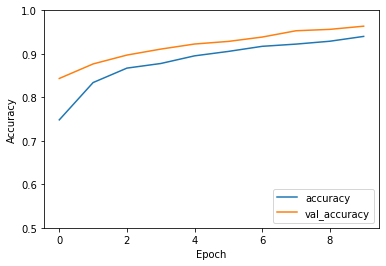

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

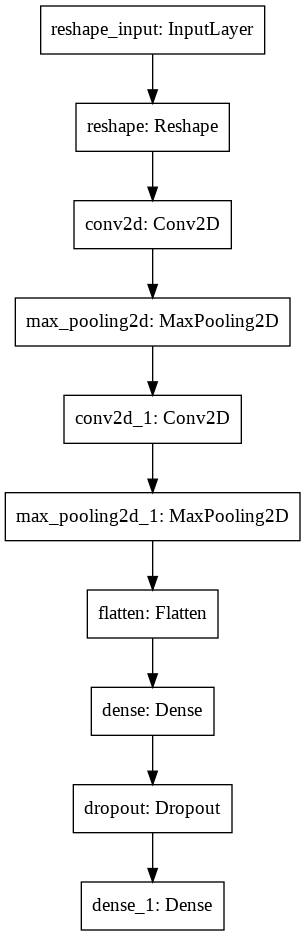

In [22]:
keras.utils.plot_model(model)